# Inflation Review - Heat Map

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read inflation .csv data into a DataFrame
df=pd.read_csv('inflation.csv', index_col=0)
df.head()

1961  1962   1963  1964  1965  1966  1967  1968  1969  1970  ...  \
country                                                                   ...   
Afghanistan   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Algeria      3.47  2.35  0.549   1.7   1.5  1.82  1.31  3.14  1.92  4.94  ...   
Andorra       NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

              2008      2009   2010   2011  2012     2013   2014   2015  \
country                                                                   
Afghanistan   2.18  -2.11000   9.44  10.60  8.30  3.88000  0.596  2.430   
Albania       7.63   2.42000   4.49   2.31  1.04  0.29000  1.550  0.564   
Algeria      15.40 -11.20000  16.10  18.20  7.48 -0.06180 -0.290 -6.570   
Andorra       1.98  -0.00001   1.60   2.50  1.10  0.00036 -0.100 -0.455   
Angola       19.70  -7.42000  22.40  24.10  5.73  3.75000 -1.310 -3.980   

               2016   2017  
country                     
Afghanistan   5.120   4.87  
Albania      -0.481   1.37  
Algeria       0.890   6.80  
Andorra       0.700   0.90  
Angola       27.700  31.10  

[5 rows x 57 columns]

In [3]:
# missing data review
df.isnull().sum().plot()

In [4]:
# Extract countries and years of interest
G7 = ["Canada", "France", "Germany", "Italy", "Spain", "United Kingdom", "United States"]

# what is the window of interest
startYear=2000
endYear=2017

year0=int(df.columns.tolist()[0]) # what is the first year in the data
Years=df.columns[startYear-year0:endYear-(year0-1)]# filter in yrs we want
ncols=len(Years)
dfg7 = df.loc[G7][Years] # filter in rows we want
dfg7

2000   2001  2002  2003  2004   2005   2006  2007   2008  \
country                                                                    
Canada          4.34  1.660  1.24  3.26  3.28  3.150  2.610  3.32  4.000   
France          1.60  2.040  2.08  1.86  1.67  1.990  2.230  2.62  2.430   
Germany        -0.45  1.280  1.35  1.21  1.09  0.621  0.304  1.70  0.839   
Italy           1.97  2.990  3.35  3.18  2.52  1.890  1.900  2.43  2.480   
Spain           3.28  4.080  4.11  3.92  3.92  4.150  3.980  3.33  2.140   
United Kingdom  2.05  0.862  2.23  2.41  2.51  2.650  3.030  2.58  2.820   
United States   2.28  2.280  1.54  1.99  2.75  3.220  3.070  2.66  1.960   

                 2009   2010   2011    2012   2013   2014   2015   2016   2017  
country                                                                         
Canada         -2.290  2.870  3.240  1.2200  1.590  1.970 -0.756  0.612  2.270  
France          0.137  1.050  1.060  1.2900  0.778  0.586  1.180  0.181  0.996  
Germany         1.760  0.758  1.070  1.5400  1.970  1.790  2.010  1.330  1.540  
Italy           1.960  0.319  1.470  1.3800  1.210  0.959  0.938  0.848  0.629  
Spain           0.253  0.160  0.029  0.0679  0.354 -0.195  0.611  0.283  0.955  
United Kingdom  1.520  1.570  2.010  1.5600  1.900  1.720  0.456  1.970  1.960  
United States   0.759  1.220  2.060  1.8400  1.620  1.790  1.080  1.280  1.800

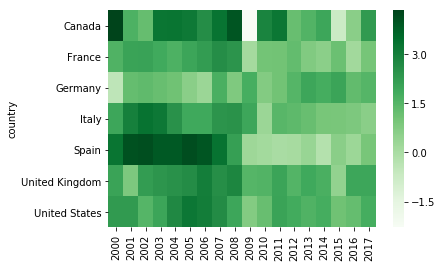

In [5]:
# Heatmap with common color scale across all years
sns.heatmap(dfg7, cmap="Greens", annot=False)

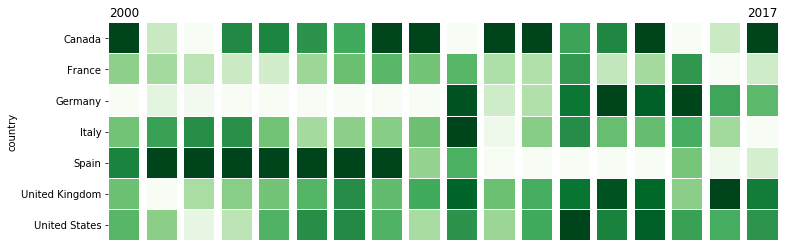

In [8]:
# Heatmap with each column (year) as its own color scale
# also useful when each column is a different measure
fig,axes=plt.subplots(figsize=(12,4), ncols=ncols)
sns.heatmap(dfg7[[Years[0]]], linewidths=0.01, ax=axes[0],
            cmap="Greens", annot=False, fmt='.10g', xticklabels=False,
            cbar=False)
axes[0].set_title(Years[0])
for i in range(1,ncols):
    sns.heatmap(dfg7[[Years[i]]], linewidths=0.01, ax=axes[i],
                cmap="Greens", annot=False, fmt='.10g', xticklabels=False,
                yticklabels=False, cbar=False)
    axes[i].set_ylabel("") # sparse column labels
    if (i == (ncols-1)):
       axes[i].set_title(Years[i])
plt.show()
plt.close()